<img src="https://sensika.com/wp-content/uploads/2019/04/Example-Positive-negative-neutral-sentiment.png"/>


# Sentiment Identiﬁcation of Roman-Urdu dataset
***

### **Business Problem**: Can you identify the sentiment of a review?

Here, I am **building an algorithm that automatically idetifies the review of a movie as positive/ negative or neutral**. I will be provided reviews of movies as input. 

### Dataset Features

- **Review**: Document review (input field)
- **Sentiment:** Positive/ negative/ neutral (Output field)

**Data Source:** https://archive.ics.uci.edu/ml/datasets/Roman+Urdu+Data+Set

- __author__ = "Laxmi Vanam"
- __email__ = "laxmivanam05@gmail.com"

## Importing packages

In [1]:
import numpy as np
import pandas as pd

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#to work on text data
import re
import string

#for memory management
import gc 

#for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [2]:
data = pd.read_csv('C:/Users/laxmi/Documents/aws/Urdu dataset/Roman Urdu DataSet.csv',  usecols = [0,1], names = ['review','sentiment'])
data.head(3)

,review,sentiment
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive
1,sahi bt h,Positive
2,"Kya bt hai,",Positive


In [3]:
print("The size of the training data is: " + str(data.shape))
print(data.dtypes)

The size of the training data is: (20229, 2)
review       object
sentiment    object
dtype: object


## Data cleaning

#### Data Quality Check

Checking for NULL records:

In [4]:
data.isna().sum()

review       1
sentiment    0
dtype: int64

Dropping all na values and Null records

In [5]:
data.dropna(inplace= True)

In [6]:
def clean_df(input_df):
    input_df['review'] = input_df['review'].apply(lambda x: ' '.join(x.split())) #removing blanks
    input_df['review'].replace('', np.nan, inplace = True) #replacing blanks with nan
    input_df.dropna(subset = ['review'], inplace = True) #dropping blank values
    return input_df 

In [7]:
data.isna().sum()

review       0
sentiment    0
dtype: int64

In [8]:
data = clean_df(data)

Checking the count of reviews on each sentiment:

In [9]:
data['sentiment'].value_counts()

Neutral     8816
Positive    6013
Negative    5286
Neative        1
Name: sentiment, dtype: int64

In [10]:
data[data['sentiment'] == 'Neative']

,review,sentiment
13277,product achi hai but wrong waist size send kar...,Neative


It deifnitely sounds like a typo on the sentimet Neative where it is supposed to be Negative. So replacing Neative with Negative:

In [11]:
data['sentiment'] = data['sentiment'].replace('Neative','Negative')

Checking the number of reviews per sentiment again:

Neutral     8816
Positive    6013
Negative    5287
Name: sentiment, dtype: int64



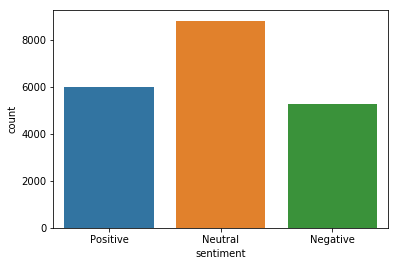

In [12]:
print(data['sentiment'].value_counts())
print()
sns.countplot(data['sentiment'])

We can see that the counts are not too unbalanced

## Text Normalization

Text data is always noisy and it needs to be cleaned up before it can be used for modeling. Below are some of the normalizing techniques that can be used on the reviews: 

- Lowercasing the words
- Removing punctuations
- Removing stopwords
- Remove numbers
- Removing spaces

In [13]:
from nltk.corpus import stopwords
stopwordslist = stopwords.words('romanurdu')
print(stopwordslist)

['ai', 'ayi', 'hy', 'hai', 'main', 'ki', 'tha', 'koi', 'ko', 'sy', 'woh ', 'bhi', 'aur', 'wo', 'yeh', 'rha', 'hota', 'ho', 'ga', 'ka', 'le', 'lye ', 'kr', 'kar', 'lye', 'liye', 'hotay', 'waisay', 'gya', 'gaya', 'kch', 'ab', 'thy', 'thay', 'houn', 'hain', 'han', 'to', 'is', 'hi', 'jo', 'kya', 'thi', 'se', 'pe', 'phr', 'wala', 'waisay', 'us', 'na', 'ny', 'hun', 'rha', 'raha', 'ja', 'rahay', 'abi', 'uski', 'ne', 'haan', 'acha', 'nai', 'sent', 'photo', 'you', 'kafi', 'gai', 'rhy', 'kuch', 'jata', 'aye', 'ya', 'dono', 'hoa', 'aese', 'de', 'wohi', 'jati', 'jb', 'krta', 'lg', 'rahi', 'hui', 'karna', 'krna', 'gi', 'hova', 'yehi', 'jana', 'jye', 'chal', 'mil', 'tu', 'hum', 'par', 'hay', 'kis', 'sb', 'gy', 'dain', 'krny', 'tou']


Function to nornalize text:

In [14]:
def review_preprocessing(input_review):
    input_review = input_review.astype(str).str.lower() #converting to lower case
    input_review = input_review.astype(str).str.replace('[{}]'.format(string.punctuation), '') #remove punctuation
    input_review = input_review.astype(str).str.replace("[^a-zA-Z#]",' ') #remove special characters
    input_review = input_review.apply(lambda x: ' '.join([word for word in str(x).split() if not word.isdigit() if not word in stopwordslist])) #remove numbers
    input_review = input_review.astype(str).str.strip() #remove spaces
    return input_review

In [15]:
data['review'] = review_preprocessing(data['review'])

Checking for duplicate records:

In [16]:
data. duplicated().sum()

742

Dropping the duplicate records by keeping only the first one:

In [17]:
data = data.drop_duplicates(keep='first').reset_index(drop = True)

## Exploratory Data Analysis

#### Summary Statistics:

In [18]:
data.describe().transpose()

,count,unique,top,freq
review,19374,19334,,3
sentiment,19374,3,Neutral,8326


Checking distribution of length of reviews in 3 classes:

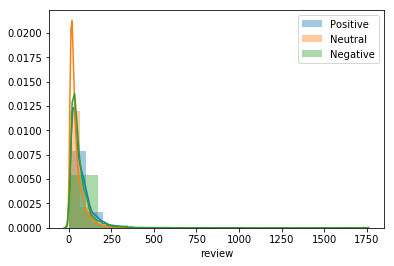

In [19]:
sns.distplot (data.review.str.len()[data['sentiment']=='Positive'], bins=10, label='Positive')
sns.distplot (data.review.str.len()[data['sentiment']=='Neutral'], bins=10, label='Neutral')
sns.distplot (data.review.str.len()[data['sentiment']=='Negative'], bins=10, label='Negative')
plt.legend()
plt.show()

Checking the count of reviews for each sentiment:

Neutral     8326
Positive    5811
Negative    5237
Name: sentiment, dtype: int64



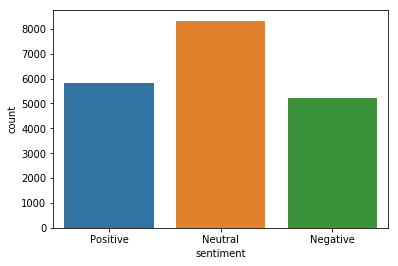

In [20]:
print(data['sentiment'].value_counts())
print()
sns.countplot(data['sentiment'])

#### Story generation from reviews

We can see that the most frequent words appear in larger fonts and less frequent appear in smaller fonts.

For Positive sentiment:

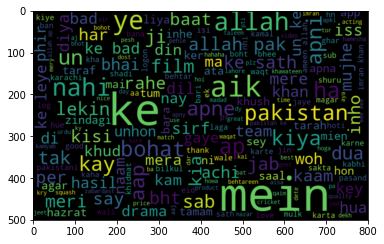

In [21]:
from wordcloud import WordCloud
all_words = ' '.join([word for word in data[data['sentiment'] == 'Positive']['review']])
wordcloud_gen = WordCloud(width=800, height=500, random_state=1, max_font_size=110).generate(all_words)
plt.imshow(wordcloud_gen, interpolation="bilinear")
plt.show()

For Negative sentiment:

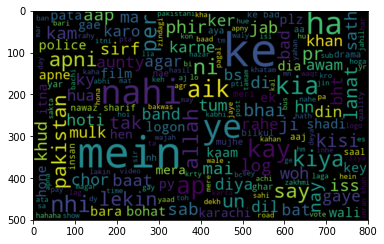

In [22]:
from wordcloud import WordCloud
all_words = ' '.join([word for word in data[data['sentiment'] == 'Negative']['review']])
wordcloud_gen = WordCloud(width=800, height=500, random_state=1, max_font_size=110).generate(all_words)
plt.imshow(wordcloud_gen, interpolation="bilinear")
plt.show()

For Neutral sentiment:

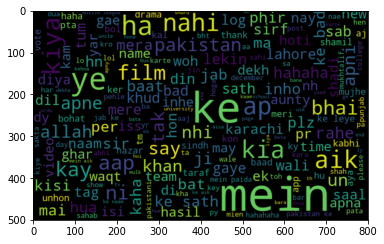

In [23]:
from wordcloud import WordCloud
all_words = ' '.join([word for word in data[data['sentiment'] == 'Neutral']['review']])
wordcloud_gen = WordCloud(width=800, height=500, random_state=1, max_font_size=110).generate(all_words)
plt.imshow(wordcloud_gen, interpolation="bilinear")
plt.show()

### Topic modeling:

LatentDirichletAllocation is the technique used here to assign the words to the chosen number of topics. 

In [24]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

cv_data = cv.fit_transform(data['review'])

lda_model = LatentDirichletAllocation(n_topics=3,random_state=1)

topics = lda_model.fit_transform(cv_data)

#define variables
n_top_words = 10
topic_summaries = []


topic_word = lda_model.components_
# Get the vocabulary from the text features
vocab = cv.get_feature_names()


# Display the Topic Models
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
    print('Topic {}: {}'.format(i, ' | '.join(topic_words)))


C:\Users\laxmi\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0: ha | ye | or | he | me | ap | nhi | nahi | ni | bht
Topic 1: ke | mein | aik | kiya | in | khan | pakistan | kay | nahi | un
Topic 2: allah | me | ap | kia | or | dua | ameen | pak | bhai | ha


## Preprocessing

In [25]:
#Change sentiment to numerical value for modeling:
data['target'] = data['sentiment'].factorize()[0]
data.head()

,review,sentiment,target
0,sai kha her kisi kay bus bat nhi lakin hal kal...,Positive,0
1,sahi bt h,Positive,0
2,bt,Positive,0
3,wah je wah,Positive,0
4,are wha kaya bat,Positive,0


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

### Splitting into train test subsets

In [27]:
from sklearn.model_selection import train_test_split

train_features,test_features, train_target, test_target = train_test_split(data['review'], data['target'],  
                                                          random_state=42, 
                                                          test_size=0.3)

## Feature Extraction

### Bag of words / Countvectorizer:

It converts a collection of reviews to a matrix of the counts of occurences of each word in the corpus(set of reviews).

In [28]:
cv = CountVectorizer(lowercase=False, stop_words=None, ngram_range=(1,2))

In [29]:
bow = cv.fit_transform(train_features)
bow.shape

(13561, 124665)

### Tf-idf features:

It weights each word the review and assigns the importance to that keyword based on the number of times it appears in the corpus (set of reviews)

In [30]:
tfidf =TfidfVectorizer(stop_words=None, ngram_range=(1,2))

In [31]:
tfidf_features = tfidf.fit_transform(train_features)
tfidf_features.shape

(13561, 124665)

### Word Embeddings

Each word is coverted into a set of vectors in this model. These vectors are the weights formed from the single hidden layer neural network that is trained on the input one hot encoded tokens.
This maintains the semantics of the word based on its context.

Src: http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/

In [32]:
from gensim.models import Word2Vec

In [33]:
train_features_w2v = train_features.reset_index()['review']
test_features_w2v = test_features.reset_index()['review']

In [34]:
tokenized_train_features_w2v = train_features_w2v.apply(lambda x:x.split())
tokenized_test_features_w2v = test_features_w2v.apply(lambda x:x.split())

In [35]:
word2vec_model = Word2Vec(           
                                       tokenized_train_features_w2v,
                                       size = 200, #desired number of features/ independent variables for each word
                                       window = 5,  #context window size
                                       min_count = 2,
                                       sg = 1, #skip gram model
                                       hs = 0,
                                       negative = 10,  #negative sampling
                                       workers = 2,
                                       seed = 34
                                       )

word2vec_model.train(tokenized_train_features_w2v, total_examples=len(train_features_w2v), epochs=10)

(1140637, 1403840)

Exploring word2vec model to see some of the most similar words it has learned:

In [36]:
word2vec_model.most_similar('wah')

[('parti', 0.8788090348243713),
 ('larki', 0.8569005131721497),
 ('iqrar', 0.8567343354225159),
 ('phansti', 0.8479235172271729),
 ('saen', 0.8324161171913147),
 ('laty', 0.8312568068504333),
 ('dta', 0.8296663165092468),
 ('nhe', 0.8295384645462036),
 ('lafaz', 0.8291864991188049),
 ('aby', 0.829131007194519)]

In [37]:
word2vec_model.most_similar('khushi')

[('medium', 0.8985174894332886),
 ('maan', 0.8978098630905151),
 ('sachi', 0.8977220058441162),
 ('afsos', 0.8937954902648926),
 ('sharat', 0.892218828201294),
 ('fitted', 0.8890879154205322),
 ('roye', 0.8873622417449951),
 ('mrd', 0.8863542079925537),
 ('smny', 0.8862298727035522),
 ('dukh', 0.8858548402786255)]

Finding similarity between 2 words:

In [38]:
word2vec_model.wv.similarity(w1 = 'sari',w2 = 'hamesha')

0.6602181773444694

Double checking the length of each word:

In [39]:
len(word2vec_model['khushi'])

200

Now, In order to prepare vector of the review, we take the average of the vectors of the words that review.

In [40]:
def word_vector(tokens, size):
    vec,count = np.zeros(size).reshape((1, size)),0
    for word in tokens:
        try:
            vec += word2vec_model[word].reshape((1, size))
            count += 1
        except KeyError: # handling the case where the token is not in the vocabulary             
            continue
            
    if count != 0:
        vec /= count
    return vec

Now, preparing Word2vec feature set for train features:

In [41]:
train_array_w2v = np.zeros((len(tokenized_train_features_w2v), 200))

for i in range(len(tokenized_train_features_w2v)):
    train_array_w2v[i,:] = word_vector(tokenized_train_features_w2v[i], 200)
    
train_features_w2v =    pd.DataFrame(train_array_w2v) 


Now, preparing Word2vec feature set for test features:

In [42]:
test_array_w2v = np.zeros((len(tokenized_test_features_w2v), 200))

for i in range(len(tokenized_test_features_w2v)):
    test_array_w2v[i,:] = word_vector(tokenized_test_features_w2v[i], 200)
    
test_features_w2v =    pd.DataFrame(test_array_w2v) 
 

## Modeling

### Finding a baseline model

The idea is to find the baseline model with default parameters and then tune hyper parameters of the resultant model to improve metric.

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline

In [45]:
pipe_logreg_cv = Pipeline ([('cv' , CountVectorizer()),('logreg', LogisticRegression (class_weight = 'balanced', random_state=42))])
pipe_logreg_tfidf = Pipeline ([('tfidf' , TfidfVectorizer()),('logreg', LogisticRegression(class_weight = 'balanced',random_state=42))])
pipe_logreg_w2v = Pipeline ([('logreg', LogisticRegression (class_weight = 'balanced',random_state=42))])

pipe_rf_cv = Pipeline ([('cv' , CountVectorizer()),('rf', RandomForestClassifier (random_state=42))])
pipe_rf_tfidf = Pipeline ([('tfidf' , TfidfVectorizer()),('rf', RandomForestClassifier (random_state=42))])
pipe_rf_w2v = Pipeline ([('rf', RandomForestClassifier (random_state=42))])

pipeline_list = [pipe_logreg_cv,pipe_logreg_tfidf,pipe_logreg_w2v,pipe_rf_cv,pipe_rf_tfidf,pipe_rf_w2v]

pipeline_dict = {0: 'Logistic Regression with CountVectorizer', 1: 'Logistic Regression with Tfidf', 
             2: 'Logistic Regression with w2v', 3: 'Random Forest with CountVectorizer', 
             4: 'Random Forest with Tfidf' , 5: 'Random Forest with w2v'}

In [47]:
for idx, gs in enumerate(pipeline_list):
    print('\nEstimator: %s' % pipeline_dict[idx])
    train_features1 = train_features_w2v if pipeline_dict[idx] == 'Logistic Regression with w2v' or  pipeline_dict[idx] == 'Random Forest with w2v'  else train_features
    test_features1 = test_features_w2v if pipeline_dict[idx] == 'Logistic Regression with w2v'  or  pipeline_dict[idx] == 'Random Forest with w2v'  else test_features
    # Fit grid search
    gs.fit(train_features1, train_target)
    # Predict on test data with best params
    y_pred = gs.predict(test_features1)
    # Test data accuracy of model with best params
    print('Test set accuracy score: %.3f ' % accuracy_score(test_target, y_pred))


Estimator: Logistic Regression with CountVectorizer
Test set accuracy score: 0.647 

Estimator: Logistic Regression with Tfidf
Test set accuracy score: 0.638 

Estimator: Logistic Regression with w2v
Test set accuracy score: 0.551 

Estimator: Random Forest with CountVectorizer
Test set accuracy score: 0.587 

Estimator: Random Forest with Tfidf
Test set accuracy score: 0.595 

Estimator: Random Forest with w2v
Test set accuracy score: 0.513 


### Hyperparameter tuning:

Since the highest score Logistic regression is with CountVectorizer and for Random Forest it is with Tfidf, we will take these as a baseline and then work on improving it a bit further using hyper parameter tuning. Now the resultant model will be the final model.

In [48]:
param_range = [1,  3, 5, 10]
param_range_fl = [1.0, 0.5, 0.1]
param_ngram_range = [(1,2),(1,3)]
param_max_df = [0.8, 1.0]
param_cv_tfidf_max_features =  [100,200]
param_min_samples =  [1, 2]
param_rf_max_features = ["auto",  "sqrt"]
param_penalty= ['l1', 'l2']


gridparams_logreg_cv = [{'logreg__C': param_range_fl,'logreg__penalty':param_penalty, 'cv__max_df': param_max_df,
                         #'cv__max_features': param_cv_tfidf_max_features,
                         'cv__ngram_range':param_ngram_range}]

gridparams_rf_tfidf = [{ 'rf__max_features': param_rf_max_features,
                    #    'rf__min_samples_leaf' : param_range,
'tfidf__max_df': param_max_df,#'tfidf__max_features': param_cv_tfidf_max_features
                       #, 'tfidf__ngram_range':param_ngram_range
                       }]

In [49]:
gs_logreg_cv = GridSearchCV(estimator=pipe_logreg_cv,param_grid=gridparams_logreg_cv,scoring='accuracy',cv=10)
gs_rf_tfidfcv = GridSearchCV(estimator=pipe_rf_tfidf,param_grid=gridparams_rf_tfidf,scoring='accuracy',cv=10)

In [50]:
gridlist = [gs_logreg_cv, gs_rf_tfidfcv]

grid_dict = {0: 'Logistic Regression with CountVectorizer', 
             1: 'Random Forest with Tfidf'}

In [52]:
best_acc = 0.0
best_clf = 0
best_gs = ''

for idx, gs in enumerate(gridlist):
    print('\nEstimator: %s' % grid_dict[idx])
    # Fit grid search
    gs.fit(train_features, train_target)
    #gs.fit(train_features_w2v, train_target) if gs == gs_logreg_w2v else gs.fit(train_features, train_target)
    # Best params
    print('Best params: %s' % gs.best_params_)
    y_pred = gs.predict(test_features)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(test_target, y_pred))
    #Track best (highest test accuracy) model
    if accuracy_score(test_target, y_pred) > best_acc:
        best_acc = accuracy_score(test_target, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])


Estimator: Logistic Regression with CountVectorizer
Best params: {'cv__max_df': 0.8, 'cv__ngram_range': (1, 2), 'logreg__C': 1.0, 'logreg__penalty': 'l2'}
Test set accuracy score for best params: 0.649 

Estimator: Random Forest with Tfidf
Best params: {'rf__max_features': 'auto', 'tfidf__max_df': 0.8}
Test set accuracy score for best params: 0.595 

Classifier with best test set accuracy: Logistic Regression with CountVectorizer


## Possible enhancements:

### For better metric:

- Balance the count of reviews on each of the sentiment category before modeling
- Word2vec performs better with bigger corpus. So we can get more data if possible.
- Use Sentence2Vec or even doc2vec where we can learn from feature representations of sentences/ documents instead of word semantics 
- If one can understand the language better, a new dictionary can be made for some words (such as "not great" ) that fall under a Neutral Sentiment. If these words are found then that review can be pushed to negative. 
- Look for incorrect classifications (False Positives and False Negatives) and find a pattern which is being missed by the model to use it for maximizing the model's capacity
- Use the vectors generated from LDA as a features in the classification model
- Use other models such as SVM, KNN etc
- Use Randomizedsearch to narrow down the best parameters before using Gridsearch

### For better debugging and scaling:

- Use Eli5 to debug transformations such as Count vectorizer/ tfidf vectorizer and understad the decisions behind the model.
- Make the code more modular/ OOPS oriented

## References:

- https://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction
- http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/ for Word2vecml
- https://towardsdatascience.com/unsupervised-nlp-topic-models-as-a-supervised-learning-input-cf8ee9e5cf28 for Topic modeling
- http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/ for Word2vec    
- https://www.kdnuggets.com/2018/01/managing-machine-learning-workflows-scikit-learn-pipelines-part-3.html for pipelines